In [ ]:
import yfinance as yf
import pandas as pd

stock = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
print(stock.tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-22  192.656189  194.457363  192.029255  194.228473  37122800
2023-12-26  192.108841  192.944742  191.889912  192.666108  28919300
2023-12-27  192.208359  192.556659  190.158404  191.551588  48087700
2023-12-28  192.636261  193.710998  192.228256  193.193528  34049900
2023-12-29  191.591385  193.452263  190.795282  192.954701  42628800


In [ ]:
 stock['10-day MA'] = stock['Close'].rolling(window=10).mean()
stock['50-day MA'] = stock['Close'].rolling(window=50).mean()
stock.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = stock[['10-day MA', '50-day MA']]
y = stock['Close'].shift(-1)  # Predict next day's price
X, y = X.iloc[:-1], y.iloc[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

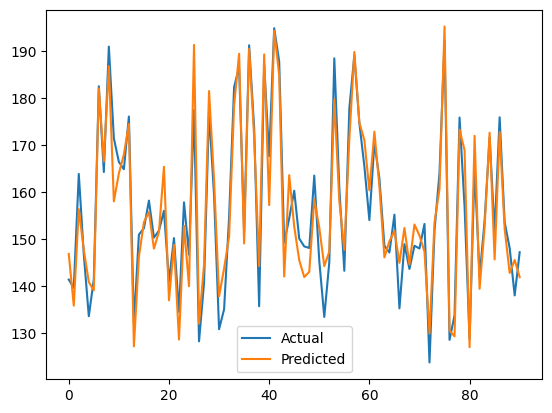

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()